## **Drinking Prediction**

**Problem Statement:**  
The goal is to predict smoking and drinking habits based on various health and demographic attributes provided in the dataset. This involves analyzing the relationships between features such as age, gender, physical measurements, and health indicators to determine patterns and build a predictive model for smoking and drinking behavior.

Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same. It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes.

#### **Importing Dependencies**

In [4]:
# Libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")


# Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

---

## **Data Collection & Data Analysis**

### **Importing Dataset**

In [5]:
dataset = pd.read_csv('smoking_drinking_dataset.csv')

In [6]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [7]:
dataset.shape

(49999, 24)

In [8]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [9]:
dataset.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,47.582052,162.245945,63.251765,81.222152,0.982914,0.980206,1.030721,1.029441,122.426509,76.054321,100.519990,195.642313,57.085462,113.200304,132.198924,14.227193,1.096862,0.859877,25.929919,25.719094,36.765055,1.612972
std,14.163445,9.300365,12.516749,11.958678,0.621226,0.615539,0.172561,0.169040,14.511625,9.915248,24.395858,38.403209,39.073328,41.011409,109.889479,1.581189,0.439370,0.326663,20.054514,25.839450,48.649750,0.820109
min,20.000000,130.000000,30.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,47.000000,54.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.100000,3.000000,2.000000,2.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.500000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,158.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,596.000000,1619.000000,8110.000000,5119.000000,9490.000000,20.300000,6.000000,23.000000,1911.000000,2309.000000,999.000000,3.000000


#### **Rename Columns for Clarity**

In [10]:
dataset.rename(columns={
    'sex': 'gender',
    'waistline': 'waist_cm',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'sight_left': 'vision_left',
    'sight_right': 'vision_right',
    'SBP': 'systolic_bp',
    'DBP': 'diastolic_bp',
    'BLDS': 'blood_sugar',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'hdl_cholesterol',
    'LDL_chole': 'ldl_cholesterol',
    'triglyceride': 'triglycerides',
    'Urine_protein': 'urine_protein',
    'serum_creatinine': 'creatinine',
    'AST': 'liver_ast',
    'ALT': 'liver_alt',
    'gamma_GTP': 'gamma_gtp',
    'SMK_stat_type_cd': 'smoking_status',
    'DRK_YN': 'is_drinker'
}, inplace=True)

In [11]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N


---

### **Checking Null Values**

In [12]:
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 gender               0
age                  0
height_cm            0
weight_kg            0
waist_cm             0
vision_left          0
vision_right         0
hear_left            0
hear_right           0
systolic_bp          0
diastolic_bp         0
blood_sugar          0
total_cholesterol    0
hdl_cholesterol      0
ldl_cholesterol      0
triglycerides        0
hemoglobin           0
urine_protein        0
creatinine           0
SGOT_AST             0
SGOT_ALT             0
gamma_gtp            0
smoking_status       0
is_drinker           0
dtype: int64


### **Checking Duplicated Values**

In [13]:
dataset[dataset.duplicated()]

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker


---

### **Visualizing the Data**

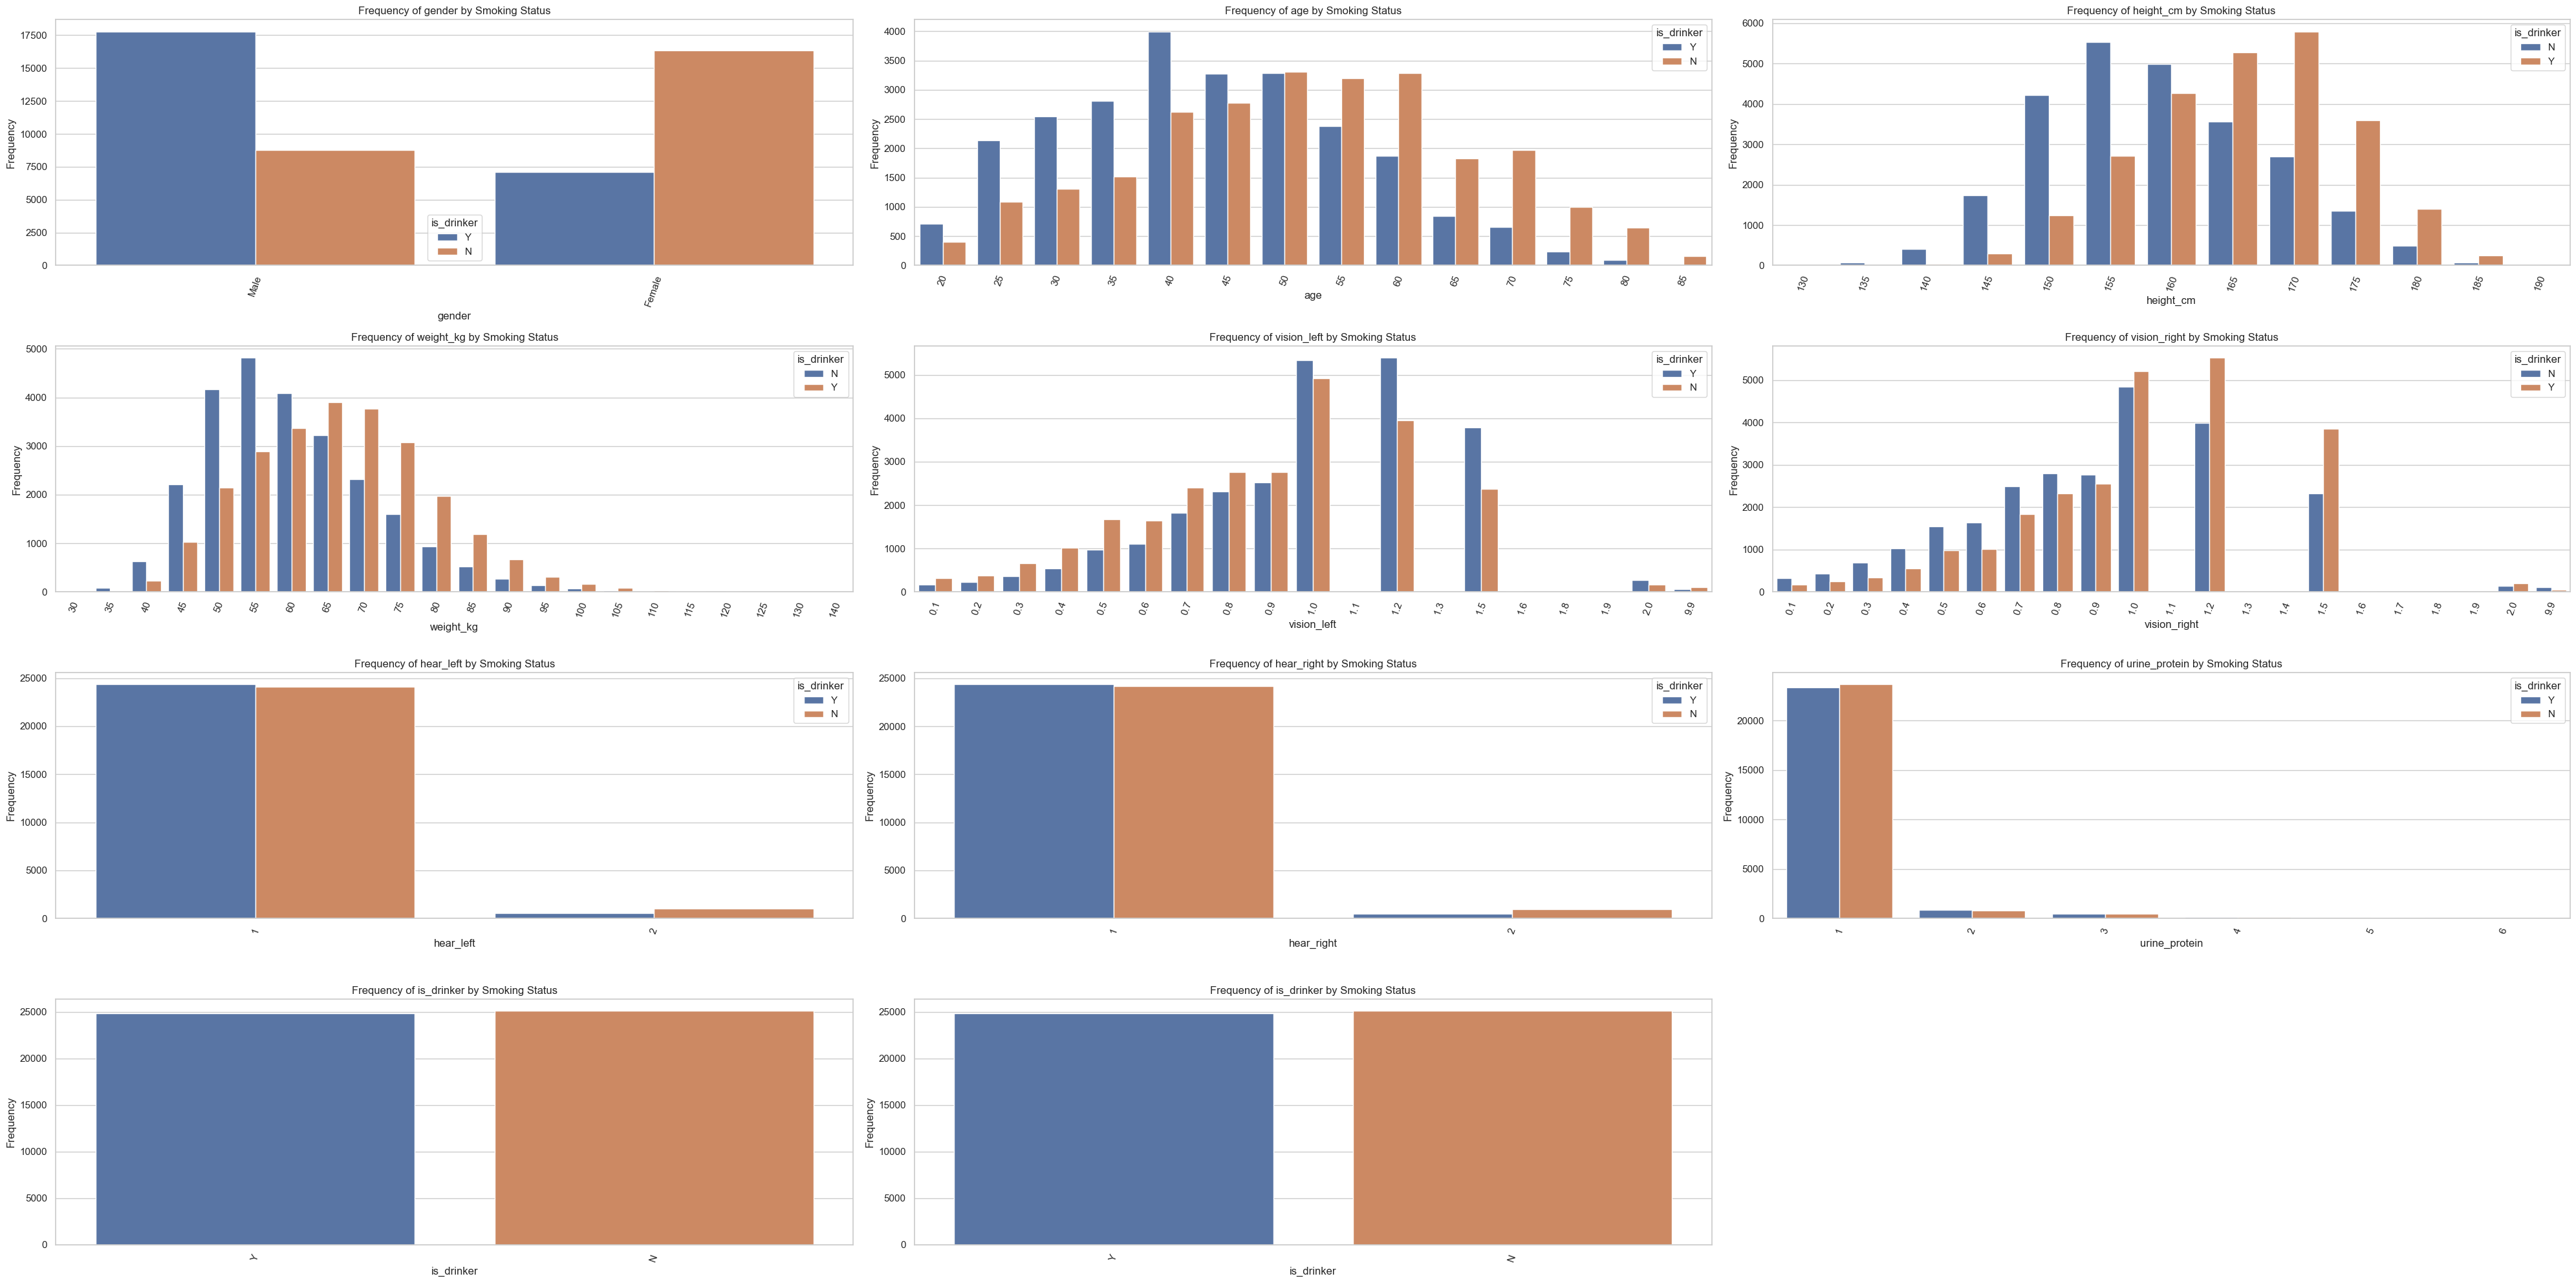

In [14]:
# current_y_is_smoking_or_drinking = 'smoking_status'
currently_is_smoking_or_drinking = 'is_drinker'

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

for idx, column in enumerate(['gender', 'age', 'height_cm', 'weight_kg', 'vision_left', 'vision_right', 'hear_left', 'hear_right',
                              "urine_protein", currently_is_smoking_or_drinking, "is_drinker"], start=1):

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=dataset , hue=currently_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

---

### **Removing Ineffective Columns**

In [16]:
dataset.groupby('is_drinker').mean(numeric_only=True)

,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status
is_drinker,,,,,,,,,,,,,,,,,,,,,,
N,51.485712,158.843628,60.030845,80.162370,0.938454,0.934725,1.040675,1.038804,122.010149,75.150283,100.187694,194.969155,56.563759,114.885696,121.671933,13.763771,1.096633,0.830801,25.152392,24.330693,26.943246,1.328465
Y,43.638685,165.682869,66.505448,82.292715,1.027825,1.026149,1.020665,1.019982,122.847103,76.967555,100.855667,196.322317,57.612471,111.497769,142.832992,14.695328,1.097093,0.889249,26.715354,27.121618,46.686769,1.900374


In [17]:
dataset.drop(['hear_left', 'hear_right', 'urine_protein','blood_sugar'], axis=1, inplace=True)

---

### **Feature Engineering**

In [18]:
# Liver_Enzyme_Ratio = SGOT_AST / SGOT_ALT
dataset['Liver_Enzyme_Ratio'] = dataset['SGOT_AST'] / dataset['SGOT_ALT']

In [19]:
# Anemia_Indicator if hemoglobin < 12 --> anemia
anemia_threshold = 12
dataset['Anemia_Indicator'] = (dataset['hemoglobin'] < anemia_threshold).astype(int)

In [20]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,Liver_Enzyme_Ratio,Anemia_Indicator
0,Male,35,170,75,90.0,1.0,1.0,120,80,193,48,126,92,17.1,1.0,21,35,40,1,Y,0.600000,0
1,Male,30,180,80,89.0,0.9,1.2,130,82,228,55,148,121,15.8,0.9,20,36,27,3,N,0.555556,0
2,Male,40,165,75,91.0,1.2,1.5,120,70,136,41,74,104,15.8,0.9,47,32,68,1,N,1.468750,0
3,Male,50,175,80,91.0,1.5,1.2,145,87,201,76,104,106,17.6,1.1,29,34,18,1,N,0.852941,0
4,Male,50,165,60,80.0,1.0,1.2,138,82,199,61,117,104,13.8,0.8,19,12,25,1,N,1.583333,0


---

### **Handling Imbalanced Dataset**

In [21]:
dataset['is_drinker'].value_counts() # Dataset already balanced

is_drinker
N    25126
Y    24873
Name: count, dtype: int64

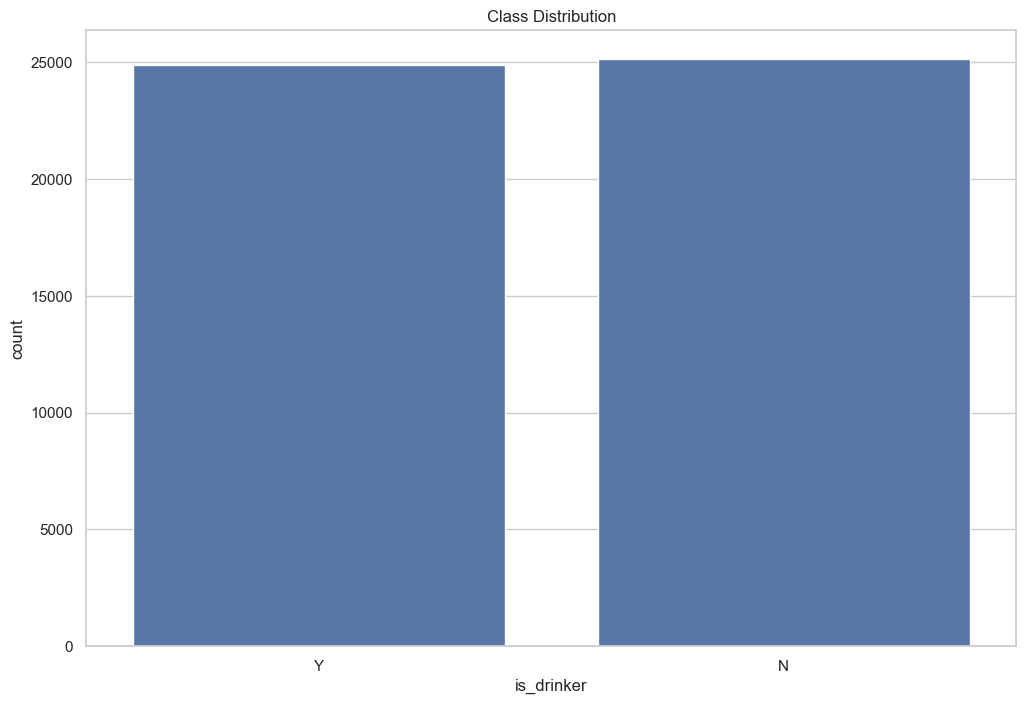

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='is_drinker', data=dataset)
plt.title('Class Distribution')
plt.show()

---

### **Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
dataset['gender'] = le.fit_transform(dataset.gender)        # Male=1, Female=0
dataset['is_drinker'] = le.fit_transform(dataset.is_drinker)  # N=0, Y=1 
dataset

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,Liver_Enzyme_Ratio,Anemia_Indicator
0,1,35,170,75,90.0,1.0,1.0,120,80,193,48,126,92,17.1,1.0,21,35,40,1,1,0.600000,0
1,1,30,180,80,89.0,0.9,1.2,130,82,228,55,148,121,15.8,0.9,20,36,27,3,0,0.555556,0
2,1,40,165,75,91.0,1.2,1.5,120,70,136,41,74,104,15.8,0.9,47,32,68,1,0,1.468750,0
3,1,50,175,80,91.0,1.5,1.2,145,87,201,76,104,106,17.6,1.1,29,34,18,1,0,0.852941,0
4,1,50,165,60,80.0,1.0,1.2,138,82,199,61,117,104,13.8,0.8,19,12,25,1,0,1.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0,40,155,50,64.0,0.8,0.8,111,69,174,76,83,72,10.4,0.8,19,16,18,1,0,1.187500,1
49995,0,85,140,50,86.2,0.2,0.2,127,86,208,31,143,168,9.9,1.8,30,22,20,1,0,1.363636,1
49996,1,25,175,65,74.0,1.2,1.2,117,83,226,71,143,60,15.9,1.1,18,16,20,3,1,1.125000,0
49997,1,60,165,65,87.0,0.8,0.8,114,59,196,46,119,156,15.1,0.9,27,25,22,2,0,1.080000,0


---

### **Outlier Treatment**

In [25]:
dataset.describe()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,Liver_Enzyme_Ratio,Anemia_Indicator
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.531591,47.582052,162.245945,63.251765,81.222152,0.982914,0.980206,122.426509,76.054321,195.642313,57.085462,113.200304,132.198924,14.227193,0.859877,25.929919,25.719094,36.765055,1.612972,0.497470,1.197380,0.064121
std,0.499006,14.163445,9.300365,12.516749,11.958678,0.621226,0.615539,14.511625,9.915248,38.403209,39.073328,41.011409,109.889479,1.581189,0.326663,20.054514,25.839450,48.649750,0.820109,0.499999,1.178574,0.244971
min,0.000000,20.000000,130.000000,30.000000,35.000000,0.100000,0.100000,75.000000,42.000000,54.000000,3.000000,1.000000,1.000000,1.000000,0.100000,3.000000,2.000000,2.000000,1.000000,0.000000,0.120930,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,112.000000,70.000000,169.000000,46.000000,89.000000,73.000000,13.200000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.878788,0.000000
50%,1.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,193.000000,55.000000,111.000000,106.000000,14.300000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,1.133333,0.000000
75%,1.000000,60.000000,170.000000,70.000000,87.500000,1.200000,1.200000,131.000000,82.000000,219.000000,66.000000,135.000000,158.000000,15.400000,1.000000,28.000000,30.000000,39.000000,2.000000,1.000000,1.421053,0.000000
max,1.000000,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,230.000000,160.000000,1619.000000,8110.000000,5119.000000,9490.000000,20.300000,23.000000,1911.000000,2309.000000,999.000000,3.000000,1.000000,238.875000,1.000000


In [26]:
original_data = dataset.copy() 

In [27]:
# Apply IQR-based clipping to numerical columns
for col in dataset.columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    dataset[col] = dataset[col].clip(lower=lower, upper=upper)

In [28]:
print("After outlier treatment:")
print(dataset.describe())

After outlier treatment:
             gender           age     height_cm     weight_kg      waist_cm  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.531591     47.582052    162.246145     63.117812     81.144435   
std        0.499006     14.163445      9.299699     12.126292      9.536119   
min        0.000000     20.000000    132.500000     32.500000     53.750000   
25%        0.000000     35.000000    155.000000     55.000000     74.000000   
50%        1.000000     45.000000    160.000000     60.000000     81.000000   
75%        1.000000     60.000000    170.000000     70.000000     87.500000   
max        1.000000     85.000000    190.000000     92.500000    107.750000   

        vision_left  vision_right   systolic_bp  diastolic_bp  \
count  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.955601      0.953617    122.297646     75.962999   
std        0.344517      0.343533     14.080316      9.591116   
min

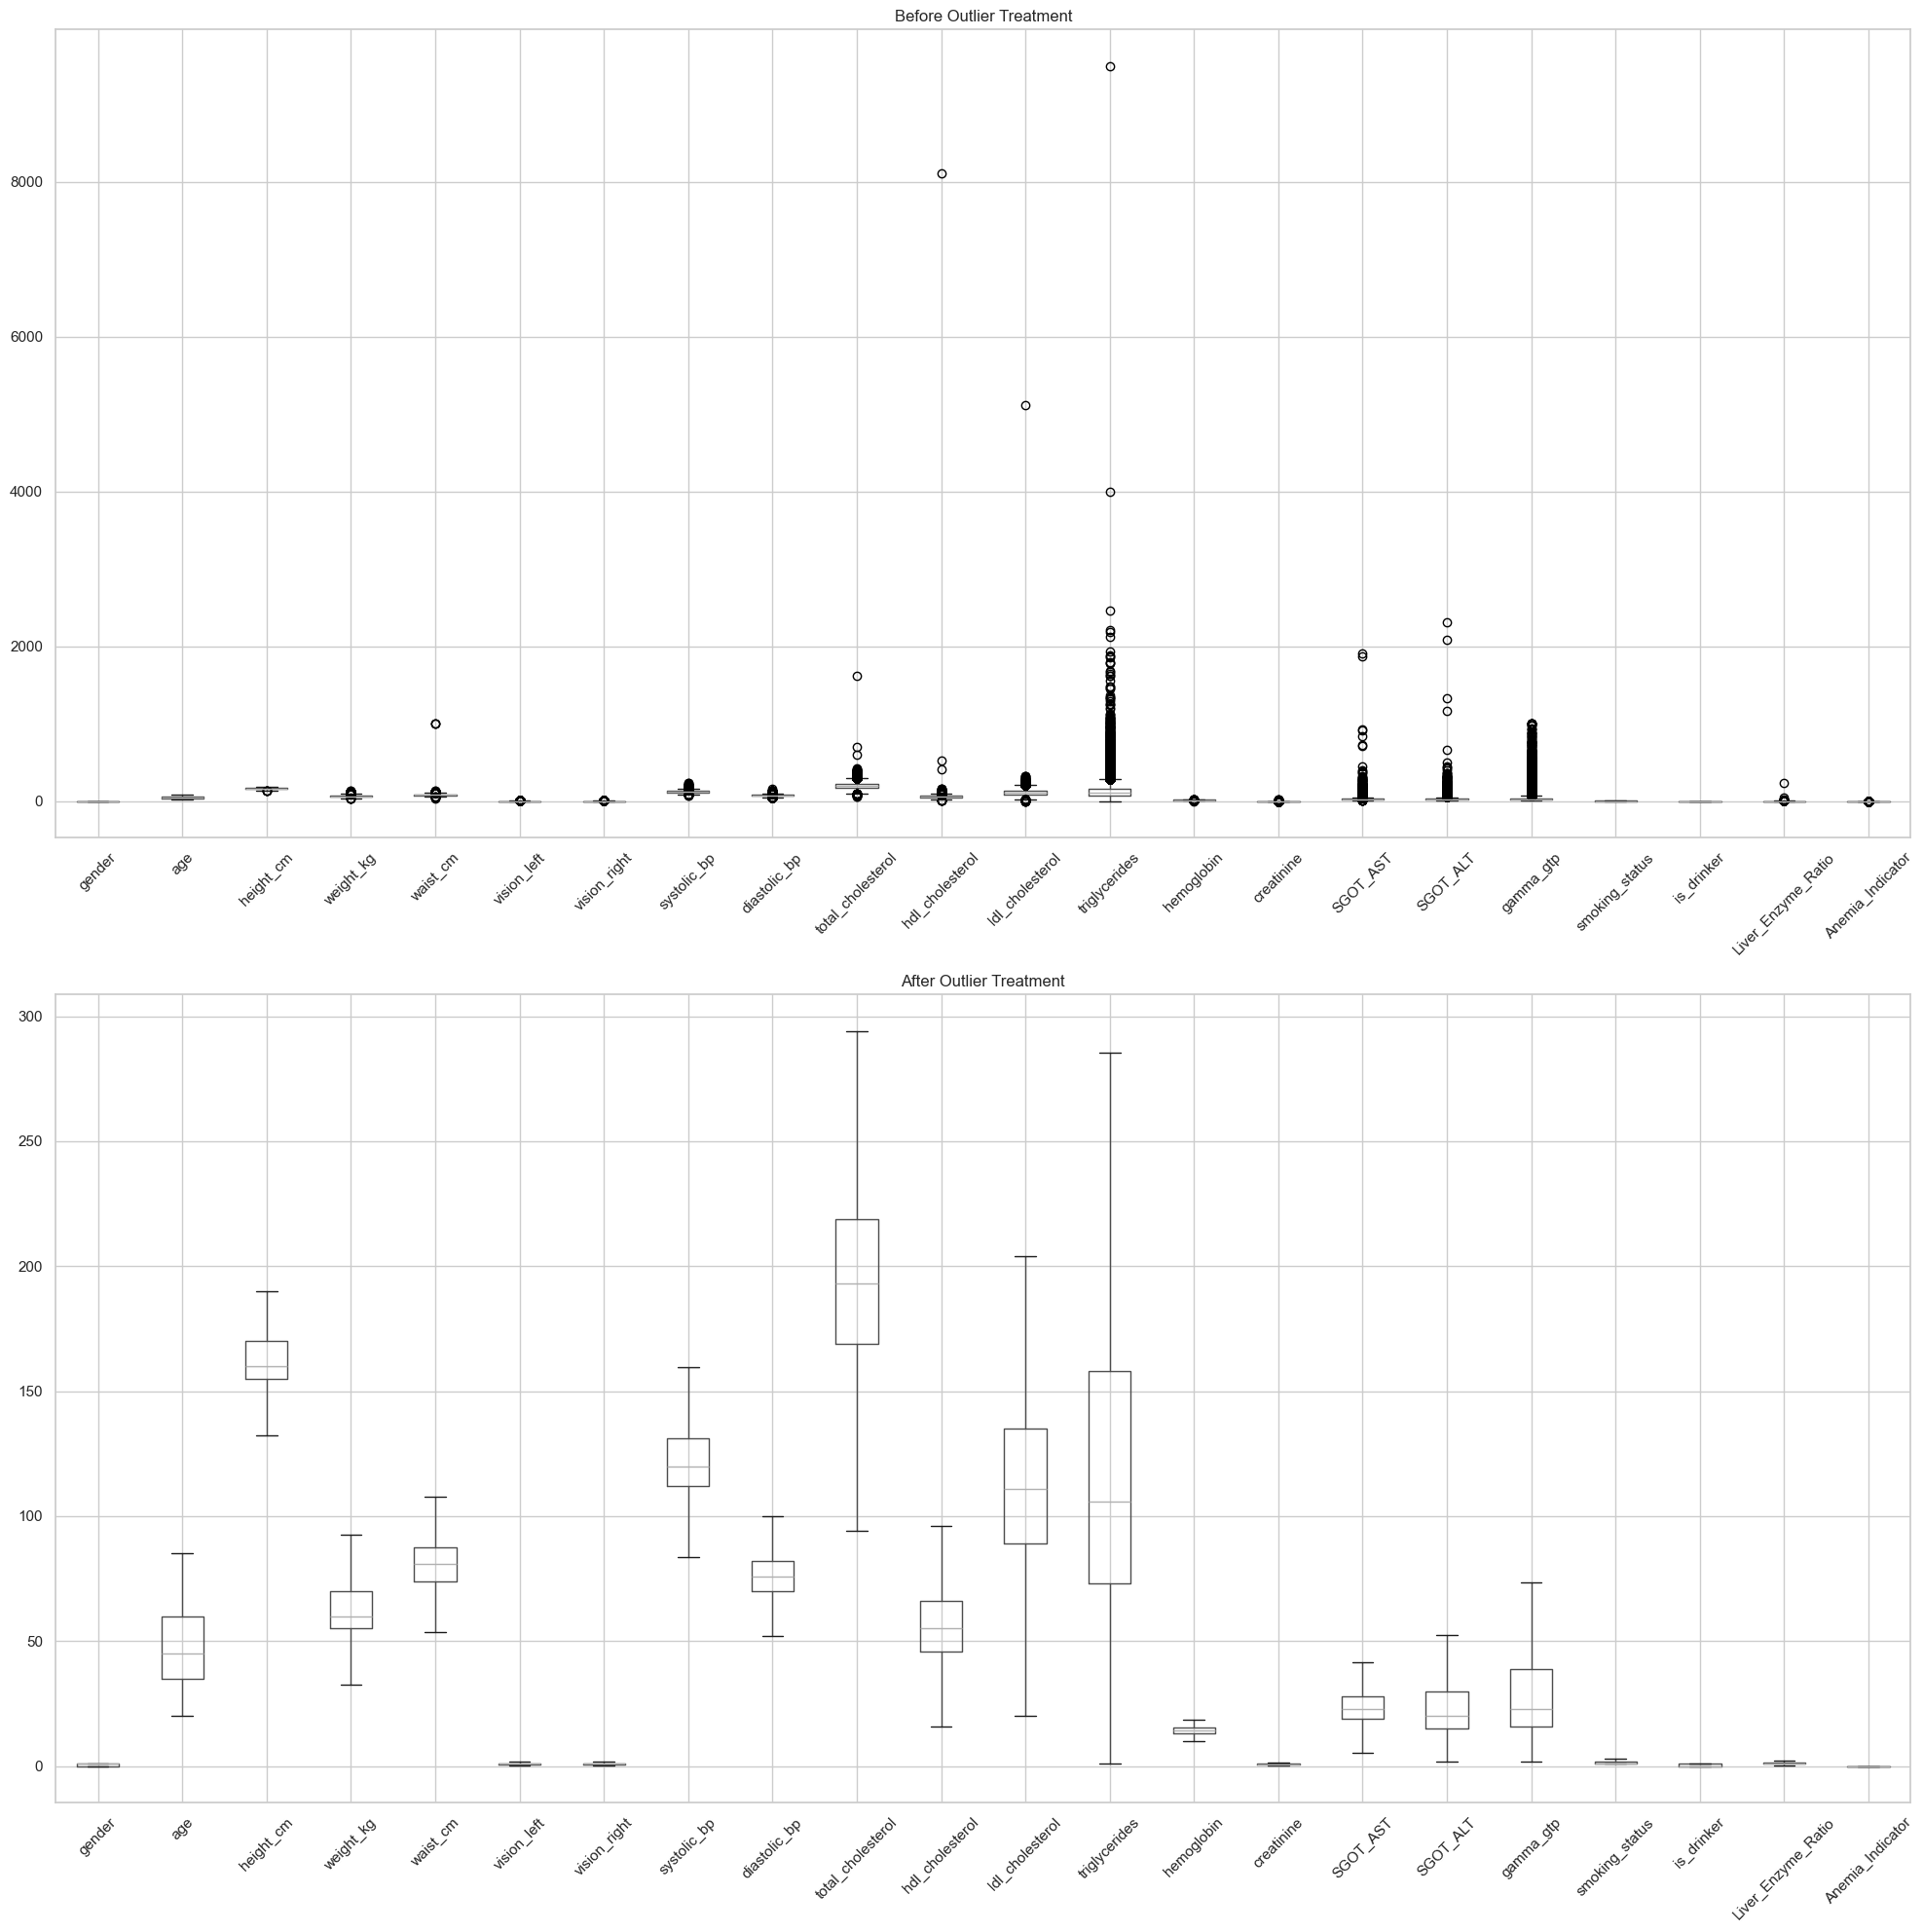

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot before
original_data.boxplot(ax=axes[0])
axes[0].set_title("Before Outlier Treatment")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after
dataset.boxplot(ax=axes[1])
axes[1].set_title("After Outlier Treatment")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---

### **Train-Test Spilit**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = dataset.drop('is_drinker', axis=1)
Y = dataset['is_drinker']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(49999, 21) (39999, 21) (10000, 21)


In [34]:
print(Y.shape, Y_train.shape, Y_test.shape)

(49999,) (39999,) (10000,)


---

## **Data Standardization**

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

## **Logestic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [39]:
lr_param = {
    'C': np.logspace(-3, 3, 7),  # Exponential range of C values
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [40]:
lr = LogisticRegression(random_state=42, max_iter=500)

In [41]:
lr_random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=lr_param,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [42]:
lr_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [43]:
lr_best_params = lr_random_search.best_params_
print("Best Parameters for Logistic Regression:", lr_best_params)

Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(1000.0)}


In [44]:
lr_best = LogisticRegression(solver='saga',penalty='l1',C=np.float64(1000.0), random_state=42, max_iter=500)
lr_best.fit(X_train, Y_train)

LogisticRegression(C=np.float64(1000.0), max_iter=500, penalty='l1',
                   random_state=42, solver='saga')

In [45]:
lr_train_predictions = lr_best.predict(X_train)
lr_test_predictions = lr_best.predict(X_test)

In [46]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, lr_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, lr_test_predictions) * 100:.2f}%")


Training Accuracy: 72.61%
Testing Accuracy: 72.78%


In [47]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, lr_train_predictions))
print("------------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, lr_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     20080
           1       0.73      0.72      0.72     19919

    accuracy                           0.73     39999
   macro avg       0.73      0.73      0.73     39999
weighted avg       0.73      0.73      0.73     39999

------------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      5046
           1       0.73      0.72      0.72      4954

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



---


## **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_param = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

In [50]:
rf = RandomForestClassifier(random_state=42)

In [51]:
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [52]:
rf_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [53]:
rf_best_params = rf_random_search.best_params_
print("Best Parameters for Random Forest:", rf_best_params)

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


In [54]:
rf_best = RandomForestClassifier(n_estimators=400, min_samples_split=15, min_samples_leaf=3,
                            max_features='log2', max_depth=10, bootstrap=True, random_state=42)
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=400, random_state=42)

In [55]:
rf_train_predictions = rf_best.predict(X_train)
rf_test_predictions = rf_best.predict(X_test)

In [56]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, rf_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, rf_test_predictions) * 100:.2f}%")


Training Accuracy: 77.62%
Testing Accuracy: 73.13%


In [57]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, rf_train_predictions))
print("------------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, rf_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     20080
           1       0.77      0.79      0.78     19919

    accuracy                           0.78     39999
   macro avg       0.78      0.78      0.78     39999
weighted avg       0.78      0.78      0.78     39999

------------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      5046
           1       0.72      0.75      0.73      4954

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



---

## **Support Vector Machines**

In [58]:
from sklearn.svm import SVC

In [59]:
svc = SVC(probability=True, random_state=42)

In [60]:
svc.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

In [61]:
svc_train_predictions = svc.predict(X_train)
svc_test_predictions = svc.predict(X_test)

In [62]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, svc_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, svc_test_predictions) * 100:.2f}%")


Training Accuracy: 74.53%
Testing Accuracy: 73.34%


In [63]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, svc_train_predictions))
print("------------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, svc_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74     20080
           1       0.74      0.75      0.75     19919

    accuracy                           0.75     39999
   macro avg       0.75      0.75      0.75     39999
weighted avg       0.75      0.75      0.75     39999

------------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5046
           1       0.73      0.74      0.73      4954

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



---

## **XGBoost**

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb_param = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [3, 5, 10, 15],  # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used at each split
    'gamma': [0, 1, 5],  # Minimum loss reduction
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed for a child
}

In [66]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [67]:
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [68]:
xgb_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10, 15],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [69]:
xgb_best_params = xgb_random_search.best_params_
print("Best Parameters for XGBoost:", xgb_best_params)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}


In [70]:
xgb_best = XGBClassifier(subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=5, 
                           learning_rate= 0.05, gamma=5, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
xgb_train_predictions = xgb_best.predict(X_train)
xgb_test_predictions = xgb_best.predict(X_test)

In [72]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, xgb_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, xgb_test_predictions) * 100:.2f}%")


Training Accuracy: 75.06%
Testing Accuracy: 73.75%


In [73]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, xgb_train_predictions))
print("------------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, xgb_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     20080
           1       0.75      0.76      0.75     19919

    accuracy                           0.75     39999
   macro avg       0.75      0.75      0.75     39999
weighted avg       0.75      0.75      0.75     39999

------------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5046
           1       0.73      0.75      0.74      4954

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



---

## **Gradient Boosting Classifier**

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gb_param = {
    'n_estimators': [50, 100, 200, 500],  # Number of boosting stages
    'max_depth': [3, 5, 10],  # Maximum depth of the individual estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate shrinks contribution of each tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting individual base learners
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for split
}

In [76]:
gb = GradientBoostingClassifier(random_state=42)

In [77]:
gb_random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [78]:
gb_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [79]:
gb_best_params = gb_random_search.best_params_
print("Best Parameters for Gradient Boosting:", gb_best_params)

Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05}


In [80]:
gb_best = GradientBoostingClassifier(subsample=0.8, n_estimators=500, min_samples_split=10, min_samples_leaf=4, 
                                     max_features=None, learning_rate=0.05, random_state=42)
gb_best.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=500,
                           random_state=42, subsample=0.8)

In [81]:
gb_train_predictions = gb_best.predict(X_train)
gb_test_predictions = gb_best.predict(X_test)

In [82]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, gb_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, gb_test_predictions) * 100:.2f}%")


Training Accuracy: 74.89%
Testing Accuracy: 73.44%


In [83]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, gb_train_predictions))
print("-----------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, gb_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     20080
           1       0.74      0.75      0.75     19919

    accuracy                           0.75     39999
   macro avg       0.75      0.75      0.75     39999
weighted avg       0.75      0.75      0.75     39999

-----------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5046
           1       0.73      0.74      0.73      4954

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



---

## **Stacking**

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', lr_best),
        ('rf', rf_best),
        ('svc', svc),
        ('xgb', xgb_best),
        ('gb', gb_best)
    ],
    final_estimator=LogisticRegression(),  # Meta-learner
    passthrough=True  # Optional: gives final model access to original features as well
)

In [86]:
stacking_clf.fit(X_train, Y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=np.float64(1000.0),
                                                   max_iter=500, penalty='l1',
                                                   random_state=42,
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       min_samples_leaf=3,
                                                       min_samples_split=15,
                                                       n_estimators=400,
                                                       random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=...
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           min_samples_leaf=4,
                                                           min_samples_split=10,
                                                           n_estimators=500,
                                                           random_state=42,
                                                           subsample=0.8))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [87]:
stacking_train_predictions = stacking_clf.predict(X_train)
stacking_test_predictions = stacking_clf.predict(X_test)

In [88]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, stacking_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, stacking_test_predictions) * 100:.2f}%")


Training Accuracy: 76.30%
Testing Accuracy: 73.79%


In [89]:
print("\nClassification Report on Training Data:")
print(classification_report(Y_train, stacking_train_predictions))
print("-----------------------------------------------------")
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, stacking_test_predictions))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76     20080
           1       0.76      0.77      0.76     19919

    accuracy                           0.76     39999
   macro avg       0.76      0.76      0.76     39999
weighted avg       0.76      0.76      0.76     39999

-----------------------------------------------------

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5046
           1       0.73      0.74      0.74      4954

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



---

In [114]:
first_row_values = dataset.iloc[3].values
formatted_values = ", ".join(map(str, first_row_values))

print(f"({formatted_values})")

(1.0, 50.0, 175.0, 80.0, 91.0, 1.5, 1.2, 145.0, 87.0, 201.0, 76.0, 104.0, 106.0, 17.6, 1.1, 29.0, 34.0, 18.0, 1.0, 0.0, 0.8529411764705882, 0.0)


In [113]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,Liver_Enzyme_Ratio,Anemia_Indicator
0,1,35,170.0,75.0,90.0,1.0,1.0,120.0,80,193,48,126,92.0,17.1,1.0,21.0,35.0,40.0,1,1,0.600000,0
1,1,30,180.0,80.0,89.0,0.9,1.2,130.0,82,228,55,148,121.0,15.8,0.9,20.0,36.0,27.0,3,0,0.555556,0
2,1,40,165.0,75.0,91.0,1.2,1.5,120.0,70,136,41,74,104.0,15.8,0.9,41.5,32.0,68.0,1,0,1.468750,0


---

## **Predictive System**

In [ ]:
input_data = (1.0, 40.0, 165.0, 75.0, 91.0, 1.2, 1.5, 120.0, 70.0, 136.0, 41.0, 74.0, 104.0, 15.8, 0.9, 41.5, 32.0, 68.0, 1.0, 0.0, 1.46875)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
# print(std_data)

prediction = stacking_clf.predict(std_data)
# print(prediction)

if (prediction[0] == 0):
  print('This person is not a Drinker')
else:
  print('The person is a Drinker')

The person is Drinking


---